In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
# Read data from 'data/cropdata.csv'

df = pd.read_csv('data/cropdata.csv')
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,Wheat,Black Soil,Germination,1,25,80.0,1
1,Wheat,Black Soil,Germination,2,26,77.0,1
2,Wheat,Black Soil,Germination,3,27,74.0,1
3,Wheat,Black Soil,Germination,4,28,71.0,1
4,Wheat,Black Soil,Germination,5,29,68.0,1


In [4]:
result1 = df['result']

# Filter and print rows where result1 is 1
print(df.shape)
print(df[result1 == 0].shape)
print(df[result1 == 1].shape)
print(df[result1 == 2].shape)

(16411, 7)
(9062, 7)
(6227, 7)
(1122, 7)


In [5]:
df = df[df['result'] != 2]

df.shape
print(df.shape)
print(df[result1 == 0].shape)
print(df[result1 == 1].shape)
print(df[result1 == 2].shape)

(15289, 7)
(9062, 7)
(6227, 7)
(0, 7)


C:\Users\yiish\AppData\Local\Temp\ipykernel_5532\3488195233.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[result1 == 0].shape)
C:\Users\yiish\AppData\Local\Temp\ipykernel_5532\3488195233.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[result1 == 1].shape)
C:\Users\yiish\AppData\Local\Temp\ipykernel_5532\3488195233.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[result1 == 2].shape)


In [6]:
# Obtain five rows that shows data
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,Wheat,Black Soil,Germination,1,25,80.0,1
1,Wheat,Black Soil,Germination,2,26,77.0,1
2,Wheat,Black Soil,Germination,3,27,74.0,1
3,Wheat,Black Soil,Germination,4,28,71.0,1
4,Wheat,Black Soil,Germination,5,29,68.0,1


In [75]:
# Perform label encoding on 'soil_type', 'crop ID', and 'Seedling Stage' columns

encoder = LabelEncoder()
df['soil_type'] = encoder.fit_transform(df['soil_type'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['crop ID'] = encoder.fit_transform(df['crop ID'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['Seedling Stage'] = encoder.fit_transform(df['Seedling Stage'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}


In [8]:
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,4,1,2,1,25,80.0,1
1,4,1,2,2,26,77.0,1
2,4,1,2,3,27,74.0,1
3,4,1,2,4,28,71.0,1
4,4,1,2,5,29,68.0,1


In [9]:
# Prepare features and target variable, and scale the features

x = df.drop('result', axis=1)
y = df['result']
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x.head()


,crop ID,soil_type,Seedling Stage,MOI,temp,humidity
0,1.04488,-1.396438,-0.677959,-1.511336,-0.344172,0.685703
1,1.04488,-1.396438,-0.677959,-1.474419,-0.241438,0.552780
2,1.04488,-1.396438,-0.677959,-1.437502,-0.138704,0.419857
3,1.04488,-1.396438,-0.677959,-1.400585,-0.035969,0.286934
4,1.04488,-1.396438,-0.677959,-1.363668,0.066765,0.154011


In [10]:
from keras.models import Sequential
from keras.layers import Dense


vanilla = Sequential()
vanilla.add(Dense(64, activation="relu", input_shape=(x.shape[1],)))
vanilla.add(Dense(32, activation="relu"))
vanilla.add(Dense(1, activation="sigmoid"))
vanilla.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
vanilla.compile(
    loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall"], optimizer="adam"
)

#Train the model
vanilla_train = vanilla.fit(
    x, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1
)

Epoch 1/100
383/383 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.9996 - precision: 0.9996 - recall: 0.9994 - val_loss: 0.5796 - val_accuracy: 0.9532 - val_precision: 0.9768 - val_recall: 0.8991
Epoch 2/100
383/383 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9996 - precision: 0.9996 - recall: 0.9994 - val_loss: 0.5841 - val_accuracy: 0.9542 - val_precision: 0.9795 - val_recall: 0.8991
Epoch 3/100
383/383 [==============================] - 1s 3ms/step - loss: 1.1491e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6170 - val_accuracy: 0.9526 - val_precision: 0.9812 - val_recall: 0.8931
Epoch 4/100
383/383 [==============================] - 1s 3ms/step - loss: 8.1135e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6016 - val_accuracy: 0.9532 - val_precision: 0.9803 - val_recall: 0.8956
Epoch 5/100
383/383 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy

In [38]:
vanilla_loss, vanilla_accuracy, vanilla_precision, vanilla_recall = vanilla.evaluate(x, y)
print(f'Vanilla model - Test Accuracy: {vanilla_accuracy}, Precision: {vanilla_precision}, Recall: {vanilla_recall}, Loss: {vanilla_loss}')


478/478 [==============================] - 1s 2ms/step - loss: 0.1202 - accuracy: 0.9917 - precision: 0.9966 - recall: 0.9830
Vanilla model - Test Accuracy: 0.991693377494812, Precision: 0.9965808987617493, Recall: 0.9829773306846619, Loss: 0.12024547904729843


In [41]:
vanilla.save('saved_models/model1.keras')

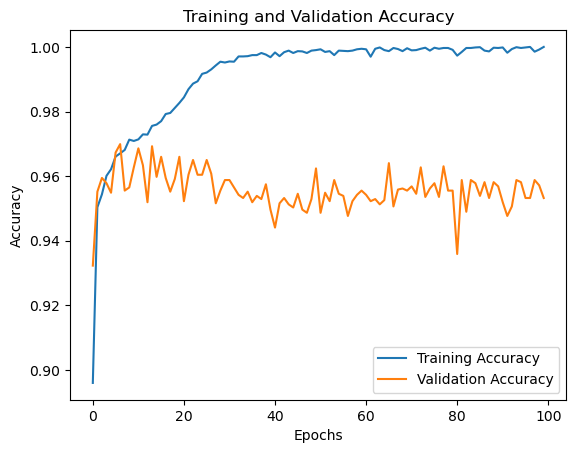

In [35]:
# Plot training and validation accuracy 


plt.plot(vanilla_train.history['accuracy'], label='Training Accuracy')
plt.plot(vanilla_train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

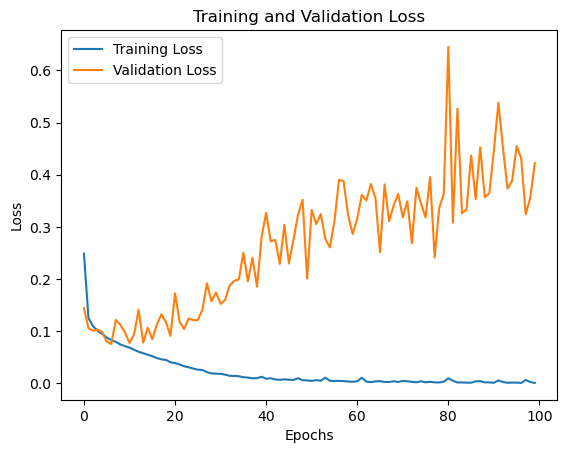

In [29]:
import matplotlib.pyplot as plt


plt.plot(vanilla_train.history['loss'], label='Training Loss')
plt.plot(vanilla_train.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# Import necessary libraries and methods

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1
from keras.callbacks import EarlyStopping


optminal = Sequential()
optminal.add(Dense(64, activation="relu", input_shape=(x.shape[1],), kernel_regularizer=l1(l1=0.001)))
optminal.add(Dropout(0.4))
optminal.add(Dense(32, activation="relu", kernel_regularizer=l1(l1=0.001)))
optminal.add(Dropout(0.4))
optminal.add(Dense(1, activation="sigmoid", kernel_regularizer=l1(l1=0.001)))

early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='auto', verbose=1)
optminal.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [49]:
optminal.compile(
    loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall"], optimizer="adam"
)

optimal_train = vanilla.fit(
    x, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1
)


Epoch 1/100
383/383 [==============================] - 1s 3ms/step - loss: 0.0039 - accuracy: 0.9991 - precision: 0.9990 - recall: 0.9988 - val_loss: 0.5782 - val_accuracy: 0.9591 - val_precision: 0.9798 - val_recall: 0.9119
Epoch 2/100
383/383 [==============================] - 1s 3ms/step - loss: 1.5382e-04 - accuracy: 0.9999 - precision: 0.9998 - recall: 1.0000 - val_loss: 0.6736 - val_accuracy: 0.9568 - val_precision: 0.9832 - val_recall: 0.9025
Epoch 3/100
383/383 [==============================] - 1s 3ms/step - loss: 4.3340e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6847 - val_accuracy: 0.9568 - val_precision: 0.9832 - val_recall: 0.9025
Epoch 4/100
383/383 [==============================] - 1s 3ms/step - loss: 3.9062e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.7012 - val_accuracy: 0.9565 - val_precision: 0.9841 - val_recall: 0.9008
Epoch 5/100
383/383 [==============================] - 1s 3ms/step - loss: 3.6044e-05 - 

In [50]:
test_loss, test_accuracy, test_precision, test_recall = optminal.evaluate(x, y)
print(f'Test Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, Loss: {test_loss}')

478/478 [==============================] - 2s 2ms/step - loss: 1.0040 - accuracy: 0.4764 - precision: 0.2733 - recall: 0.1722
Test Accuracy: 0.47635555267333984, Precision: 0.2732602655887604, Recall: 0.1721535176038742, Loss: 1.0039550065994263


In [53]:
optminal.save('saved_models/model2.keras')

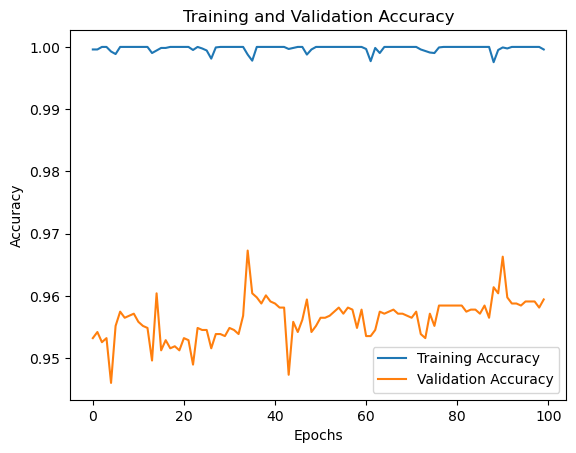

In [56]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt

plt.plot(vanilla_train.history['accuracy'], label='Training Accuracy')
plt.plot(vanilla_train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

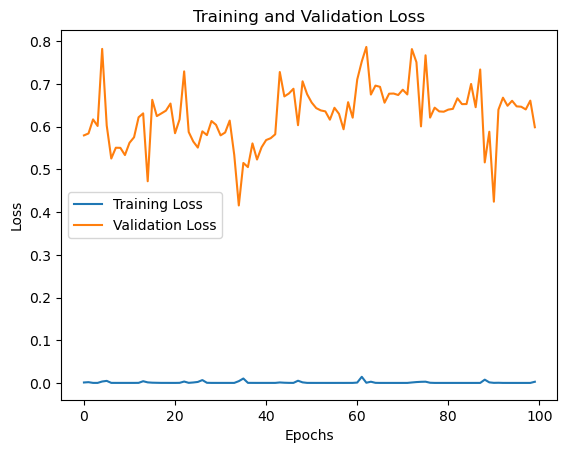

In [55]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(vanilla_train.history['loss'], label='Training Loss')
plt.plot(vanilla_train.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

***Error Analysis***

In [78]:
import numpy as np

# Predict for Vanilla model
Y_pred_vanilla = vanilla.predict(x)
Y_pred_vanilla = np.round(Y_pred_vanilla)

# Predict for vanilla model
Y_pred_l1 = vanilla.predict(x)
Y_pred_l1 = np.round(Y_pred_l1)

# Predict for optimnal model
Y_pred_l2 = optminal.predict(x)
Y_pred_l2 = np.round(Y_pred_l2)

478/478 [==============================] - 1s 2ms/step


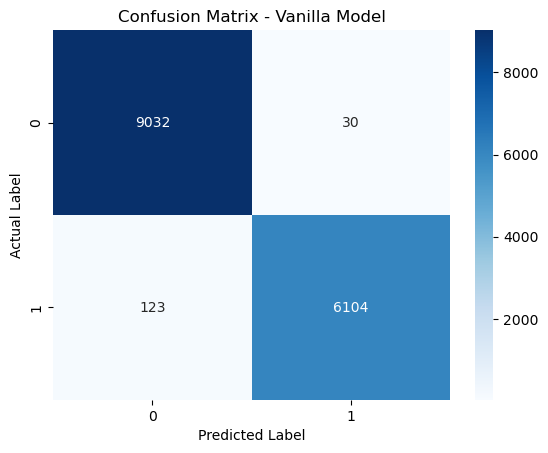

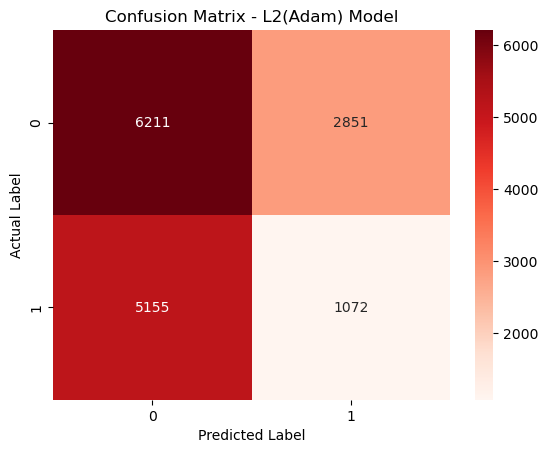

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix - Vanilla Model
vanilla_conf_matrix = confusion_matrix(y, Y_pred_vanilla)
sns.heatmap(vanilla_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Vanilla Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()





l2_conf_matrix = confusion_matrix(y, Y_pred_l2)
sns.heatmap(l2_conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.title('Confusion Matrix - L2(Adam) Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()